# Importing Necessary Libraries

In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [112]:
df1 = pd.read_csv('test.csv')
df1

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.000340,0.000432,0.000000,0.0,0.694290,0.038316,0.0,0.000000,0.0,...,0.0,0.50,0.036442,0.000000,0.0,0.023256,0.055147,0.055147,0.0,0.0
1,0.000000,0.000510,0.000576,0.000000,0.0,0.694702,0.038856,0.0,0.427536,0.0,...,0.0,0.25,0.025862,0.000000,0.0,0.028623,0.040441,0.040441,0.0,0.0
2,0.000000,0.000510,0.000576,0.000000,0.0,0.694908,0.038856,0.0,0.000000,0.0,...,0.0,0.25,0.307994,0.013699,0.0,0.026834,0.183824,0.180147,0.0,0.0
3,0.000000,0.000170,0.000432,0.000000,0.0,0.695114,0.038856,0.0,0.007246,0.0,...,0.0,0.25,0.026254,0.000000,0.0,0.030411,0.047794,0.047794,0.0,0.0
4,0.000000,0.000935,0.000720,0.000336,0.0,0.695733,0.039935,0.0,0.000000,0.0,...,0.0,0.25,0.014107,0.000000,0.0,0.028623,0.033088,0.029412,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,0.062500,0.047847,0.041333,0.048338,0.0,0.209877,0.266667,0.0,0.005937,0.0,...,0.0,0.00,0.035395,0.001223,0.0,0.027778,0.671429,0.681159,0.0,0.0
69997,0.052083,0.031100,0.036000,0.046828,0.0,0.209877,0.250000,0.0,0.003675,0.0,...,0.0,0.00,0.044729,0.001223,0.0,0.055556,0.671429,0.681159,0.0,0.0
69998,0.052083,0.021531,0.034667,0.045317,0.0,0.211934,0.266667,0.0,0.007351,0.0,...,0.0,0.00,0.050604,0.001223,0.0,0.055556,0.685714,0.681159,0.0,0.0
69999,0.052083,0.039474,0.038667,0.045317,0.0,0.211934,0.266667,0.0,0.005089,0.0,...,0.0,0.00,0.044377,0.001223,0.0,0.027778,0.671429,0.681159,0.0,0.0


In [55]:
df2 = pd.read_csv('test_label.csv')
df2

,0
0,0
1,0
2,0
3,0
4,0
...,...
69996,0
69997,0
69998,0
69999,0


# Plotting Time Series with Anomaly Regions

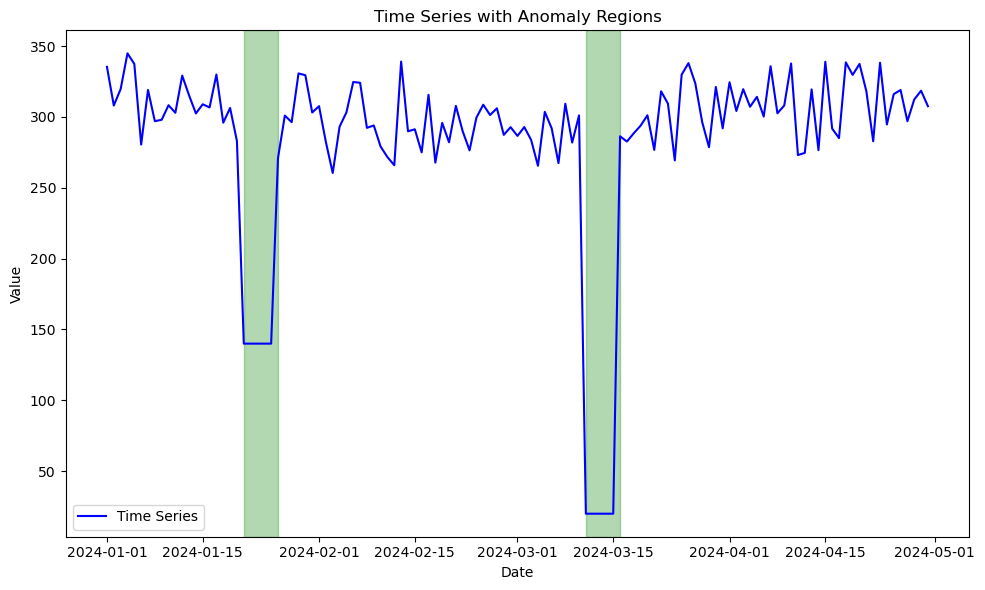

In [86]:
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-04-30')
data = np.random.normal(loc=300, scale=20, size=len(dates))
data[20:25] = 140  # Introduce anomalies
data[70:75] = 20

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')

# Define anomaly regions
anomaly_regions = [
    (pd.Timestamp('2024-01-21'), pd.Timestamp('2024-01-26')),
    (pd.Timestamp('2024-03-11'), pd.Timestamp('2024-03-16'))
]

# Plot anomaly regions
for start, end in anomaly_regions:
    plt.axvspan(start, end, color='green', alpha=0.3)

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomaly Regions')

plt.tight_layout()
plt.show()

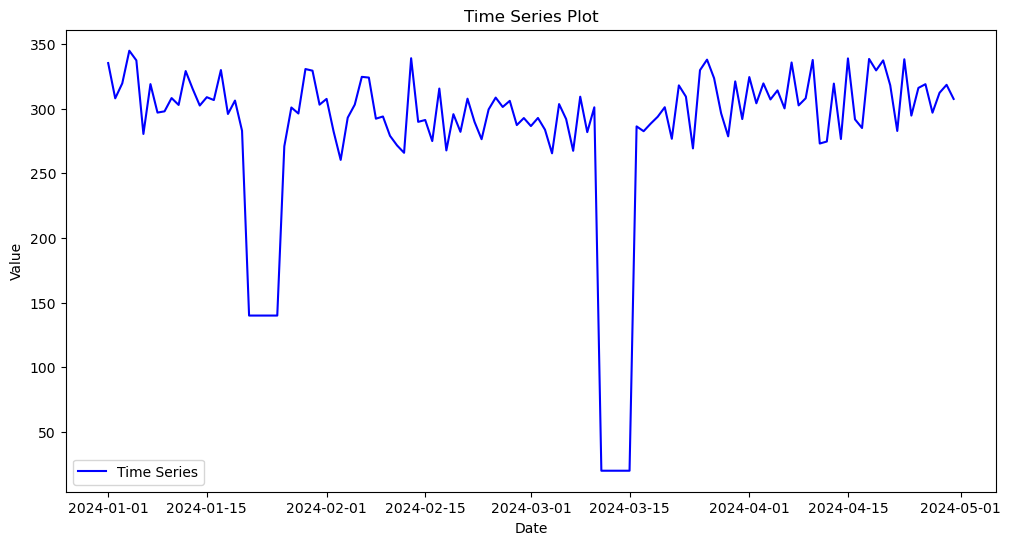

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend()
plt.show()

In [88]:
#Descriptive Statistics
print("Mean:", df['Value'].mean())
print("Standard Deviation:", df['Value'].std())
print("Median:", df['Value'].median())

Mean: 284.2367257031863
Standard Deviation: 66.86408890069755
Median: 300.2100004144164


In [89]:
# Anomaly Detection (using z-score)
threshold = 2.5  # Adjust this threshold as needed
mean = df['Value'].mean()
std = df['Value'].std()
df['anomaly'] = np.abs((df['Value'] - mean) / std) > threshold

In [90]:
df['z_score'] = (df['Value'] - mean) / std
df['z_score']

Date
2024-01-01    0.763404
2024-01-02    0.355444
2024-01-03    0.528505
2024-01-04    0.906034
2024-01-05    0.794364
                ...   
2024-04-26    0.519088
2024-04-27    0.189385
2024-04-28    0.419431
2024-04-29    0.511596
2024-04-30    0.348345
Name: z_score, Length: 121, dtype: float64

In [91]:
print(df.head())

                 Value  anomaly   z_score
Date                                     
2024-01-01  335.281047    False  0.763404
2024-01-02  308.003144    False  0.355444
2024-01-03  319.574760    False  0.528505
2024-01-04  344.817864    False  0.906034
2024-01-05  337.351160    False  0.794364


In [92]:
df['anomaly']

Date
2024-01-01    False
2024-01-02    False
2024-01-03    False
2024-01-04    False
2024-01-05    False
              ...  
2024-04-26    False
2024-04-27    False
2024-04-28    False
2024-04-29    False
2024-04-30    False
Name: anomaly, Length: 121, dtype: bool

# Plotting the Anomalies

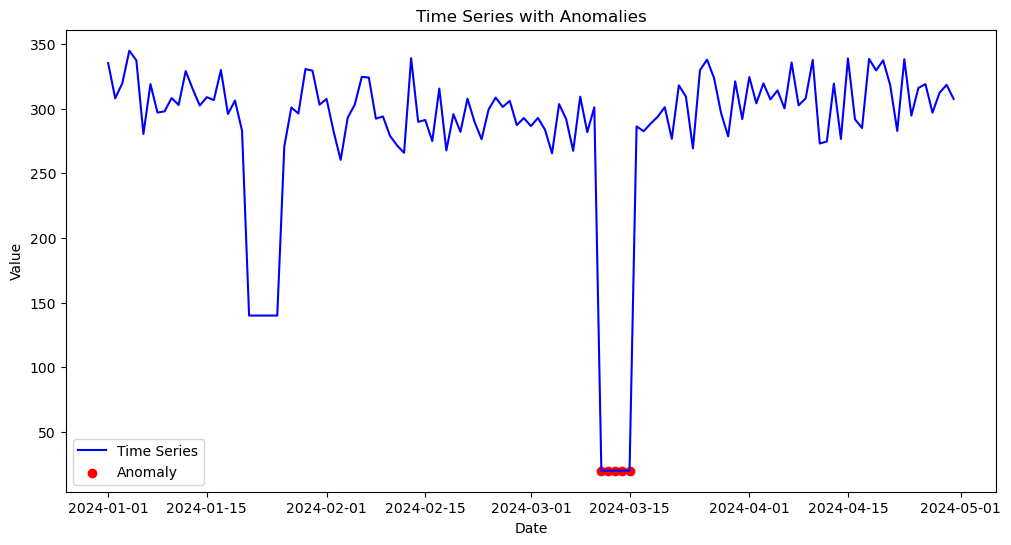

In [93]:
# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['Value'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()

In [113]:
# Calculate correlations with the target variable (time series data)
correlations = df1.corr()['0'].sort_values(ascending=False)

# Displaying the potential root cause

In [114]:
# Display variables with high positive correlations
root_causes_positive = correlations[correlations > 0.5]

# Display variables with high negative correlations (if applicable)
root_causes_negative = correlations[correlations < -0.5]

print("Potential root causes (positive correlation):")
print(root_causes_positive)

print("\nPotential root causes (negative correlation):")
print(root_causes_negative)

Potential root causes (positive correlation):
0     1.000000
10    0.727809
2     0.715192
6     0.706943
1     0.700532
23    0.700476
3     0.700325
25    0.695479
12    0.613368
22    0.536434
21    0.528886
Name: 0, dtype: float64

Potential root causes (negative correlation):
5   -0.503358
Name: 0, dtype: float64


In [130]:
df3 = pd.read_csv('msl_test.csv')
df3

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.946958,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.942278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.936037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.923557,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.917317,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73724,0.499149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73725,0.501221,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73726,0.501221,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73727,0.501221,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df4 = pd.read_csv('msl_test_label.csv')
df4

,0
0,0
1,0
2,0
3,0
4,0
...,...
73724,0
73725,0
73726,0
73727,0


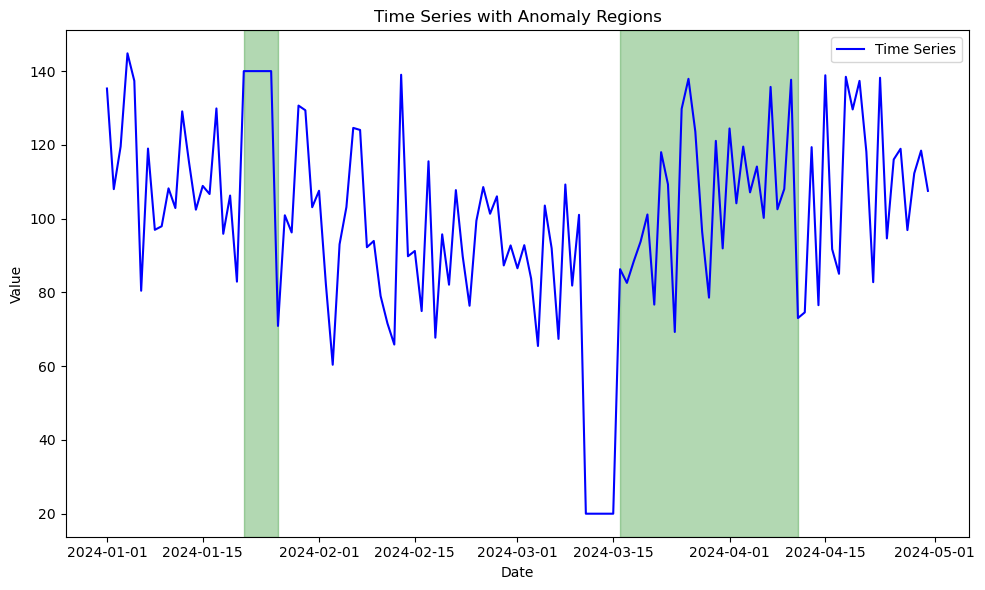

In [67]:
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-03-01')
data = np.random.normal(loc=150, scale=20, size=len(dates))
data[20:25] = 140  # Introduce anomalies
data[70:75] = 30

# Create DataFrame
df1 = pd.DataFrame({'Date': dates, 'Value': data})
df1.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')

# Define anomaly regions
anomaly_regions = [
    (pd.Timestamp('2024-01-21'), pd.Timestamp('2024-01-26')),
    (pd.Timestamp('2024-04-11'), pd.Timestamp('2024-03-16'))
]

# Plot anomaly regions
for start, end in anomaly_regions:
    plt.axvspan(start, end, color='green', alpha=0.3)

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomaly Regions')

plt.tight_layout()
plt.show()

In [68]:
#Descriptive Statistics
print("Mean:", df['Value'].mean())
print("Standard Deviation:", df['Value'].std())
print("Median:", df['Value'].median())

Mean: 100.76565132302106
Standard Deviation: 26.847099795265194
Median: 102.43350032985657


In [69]:
# 4. Anomaly Detection (Example: using z-score)
threshold = 2.5  # Adjust this threshold as needed
mean = df['Value'].mean()
std = df['Value'].std()
df['anomaly'] = np.abs((df['Value'] - mean) / std) > threshold
df['anomaly']

Date
2024-01-01    False
2024-01-02    False
2024-01-03    False
2024-01-04    False
2024-01-05    False
              ...  
2024-04-26    False
2024-04-27    False
2024-04-28    False
2024-04-29    False
2024-04-30    False
Name: anomaly, Length: 121, dtype: bool

In [70]:
df.head()

,Value,anomaly,z_score
Date,,,
2024-01-01,135.281047,False,1.285628
2024-01-02,108.003144,False,0.269582
2024-01-03,119.574760,False,0.700601
2024-01-04,144.817864,False,1.640856
2024-01-05,137.351160,False,1.362736


In [71]:
df['z_score'] = (df['Value'] - mean) / std
df['z_score']

Date
2024-01-01    1.285628
2024-01-02    0.269582
2024-01-03    0.700601
2024-01-04    1.640856
2024-01-05    1.362736
                ...   
2024-04-26    0.677145
2024-04-27   -0.143995
2024-04-28    0.428945
2024-04-29    0.658488
2024-04-30    0.251903
Name: z_score, Length: 121, dtype: float64

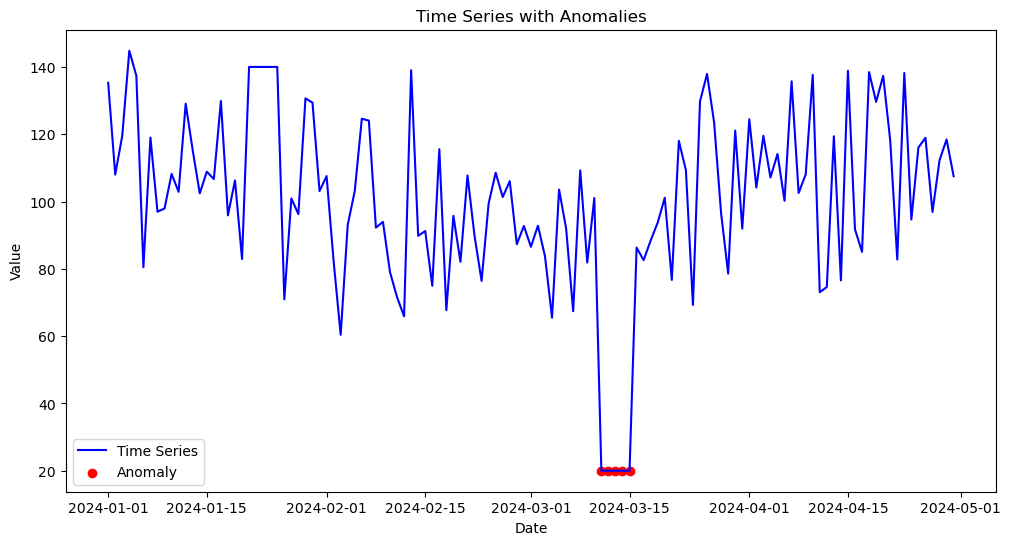

In [72]:
# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['Value'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()

In [132]:
# Calculate correlations with the target variable (time series data)
correlations = df3.corr()['0'].sort_values(ascending=False)

In [133]:
# Display variables with high positive correlations
root_causes_positive = correlations[correlations > 0.5]

# Display variables with high negative correlations (if applicable)
root_causes_negative = correlations[correlations < -0.5]

print("Potential root causes (positive correlation):")
print(root_causes_positive)

print("\nPotential root causes (negative correlation):")
print(root_causes_negative)

Potential root causes (positive correlation):
0    1.0
Name: 0, dtype: float64

Potential root causes (negative correlation):
Series([], Name: 0, dtype: float64)


In [134]:
df5 = pd.read_csv('smap_test.csv')
df5

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427612,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427613,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427614,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427615,0.995638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
df6 = pd.read_csv('smap_test_label.csv')
df6

,0
0,0
1,0
2,0
3,0
4,0
...,...
427612,0
427613,0
427614,0
427615,0


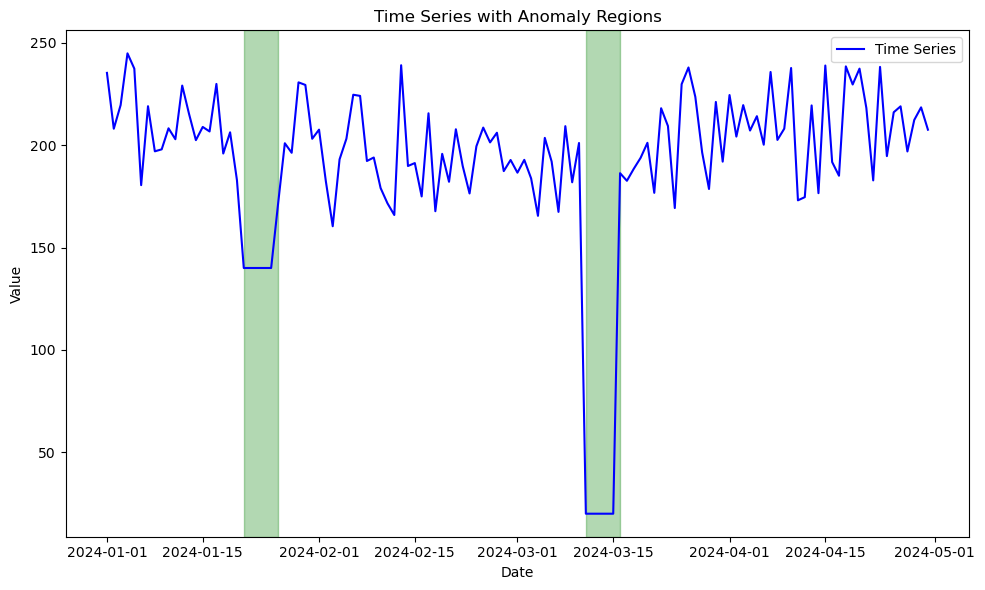

In [97]:
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-04-30')
data = np.random.normal(loc=200, scale=20, size=len(dates))
data[20:25] = 140  # Introduce anomalies
data[70:75] = 20

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')

# Define anomaly regions
anomaly_regions = [
    (pd.Timestamp('2024-01-21'), pd.Timestamp('2024-01-26')),
    (pd.Timestamp('2024-03-11'), pd.Timestamp('2024-03-16'))
]

# Plot anomaly regions
for start, end in anomaly_regions:
    plt.axvspan(start, end, color='green', alpha=0.3)

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomaly Regions')

plt.tight_layout()
plt.show()

In [98]:
#Descriptive Statistics
print("Mean:", df['Value'].mean())
print("Standard Deviation:", df['Value'].std())
print("Median:", df['Value'].median())

Mean: 192.5011885131037
Standard Deviation: 42.793968804625976
Median: 200.2100004144164


In [99]:
# 4. Anomaly Detection (Example: using z-score)
threshold = 2.5  # Adjust this threshold as needed
mean = df['Value'].mean()
std = df['Value'].std()
df['anomaly'] = np.abs((df['Value'] - mean) / std) > threshold
df['anomaly']

Date
2024-01-01    False
2024-01-02    False
2024-01-03    False
2024-01-04    False
2024-01-05    False
              ...  
2024-04-26    False
2024-04-27    False
2024-04-28    False
2024-04-29    False
2024-04-30    False
Name: anomaly, Length: 121, dtype: bool

In [100]:
df['z_score'] = (df['Value'] - mean) / std
df['z_score']

Date
2024-01-01    0.999670
2024-01-02    0.362246
2024-01-03    0.632649
2024-01-04    1.222525
2024-01-05    1.048044
                ...   
2024-04-26    0.617934
2024-04-27    0.102786
2024-04-28    0.462224
2024-04-29    0.606229
2024-04-30    0.351155
Name: z_score, Length: 121, dtype: float64

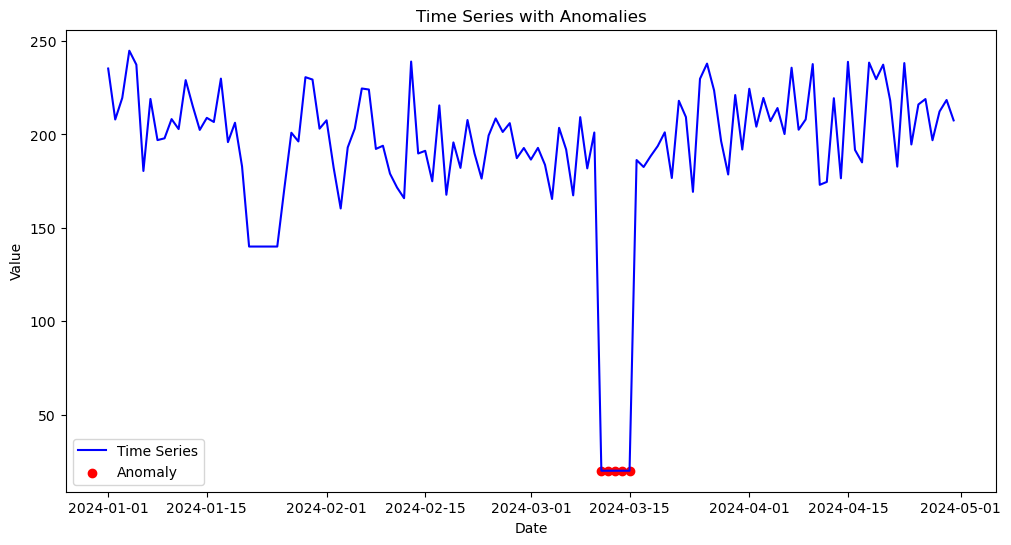

In [101]:
# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['Value'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()

In [136]:
# Calculate correlations with the target variable (time series data)
correlations = df5.corr()['0'].sort_values(ascending=False)

In [137]:
# Display variables with high positive correlations
root_causes_positive = correlations[correlations > 0.5]

# Display variables with high negative correlations (if applicable)
root_causes_negative = correlations[correlations < -0.5]

print("Potential root causes (positive correlation):")
print(root_causes_positive)

print("\nPotential root causes (negative correlation):")
print(root_causes_negative)

Potential root causes (positive correlation):
0    1.0
Name: 0, dtype: float64

Potential root causes (negative correlation):
Series([], Name: 0, dtype: float64)


In [138]:
df7 = pd.read_csv('psm_test.csv')
df7

,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24
0,132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,...,0.400617,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991
1,132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,...,0.396902,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599
2,132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,...,0.389270,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207
3,132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,...,0.403780,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599
4,132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,...,0.403636,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87836,220316.0,0.864548,0.660041,0.590923,0.413322,0.364657,0.380184,0.494318,0.450529,0.382934,...,0.394973,0.386574,0.755608,0.355207,0.835244,0.000000,0.028470,0.164872,0.021786,0.069124
87837,220317.0,0.864483,0.536428,0.590742,0.413331,0.363695,0.378601,0.500000,0.451662,0.377564,...,0.386467,0.381169,0.562101,0.349141,0.490718,0.000000,0.010676,0.157812,0.015251,0.069124
87838,220318.0,0.864644,0.636236,0.590451,0.413619,0.348942,0.377018,0.488636,0.438822,0.373536,...,0.413731,0.377329,0.640556,0.342261,0.700519,0.000000,0.028470,0.163298,0.015251,0.129032
87839,220319.0,0.864553,0.643499,0.590222,0.413689,0.355997,0.379550,0.522727,0.448640,0.374963,...,0.416956,0.378751,0.759744,0.343052,0.828556,0.000000,0.032028,0.150160,0.017429,0.059908


In [139]:
df8 = pd.read_csv('psm_test_label.csv')
df8

,timestamp_(min),label
0,132480.0,0
1,132481.0,0
2,132482.0,0
3,132483.0,0
4,132484.0,0
...,...,...
87836,220316.0,0
87837,220317.0,0
87838,220318.0,0
87839,220319.0,0


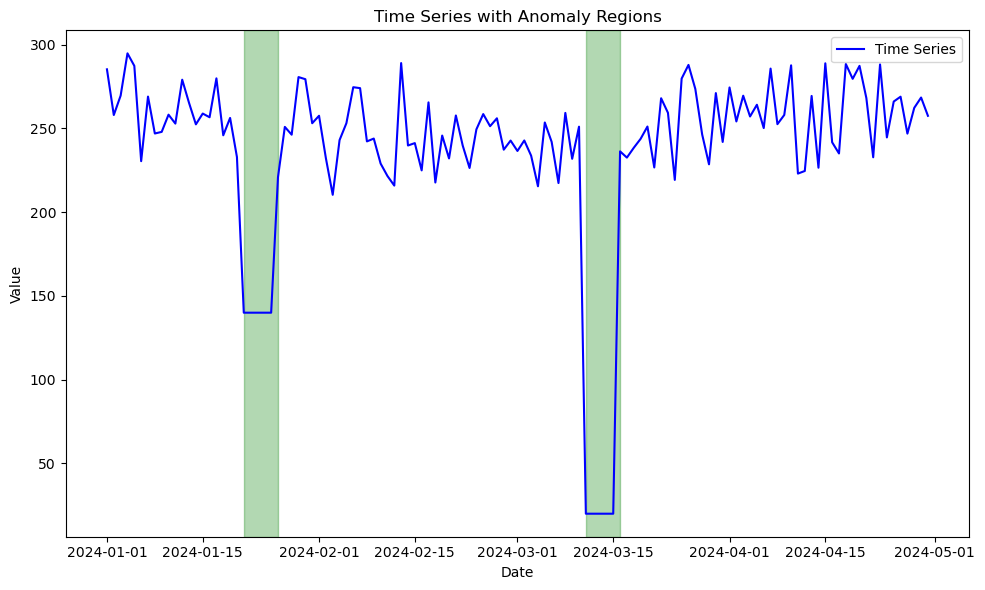

In [122]:
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-04-30')
data = np.random.normal(loc=250, scale=20, size=len(dates))
data[20:25] = 140  # Introduce anomalies
data[70:75] = 20

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')

# Define anomaly regions
anomaly_regions = [
    (pd.Timestamp('2024-01-21'), pd.Timestamp('2024-01-26')),
    (pd.Timestamp('2024-03-11'), pd.Timestamp('2024-03-16'))
]

# Plot anomaly regions
for start, end in anomaly_regions:
    plt.axvspan(start, end, color='green', alpha=0.3)

# Add legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomaly Regions')

plt.tight_layout()
plt.show()

In [123]:
#Descriptive Statistics
print("Mean:", df['Value'].mean())
print("Standard Deviation:", df['Value'].std())
print("Median:", df['Value'].median())

Mean: 238.36895710814503
Standard Deviation: 54.40541675979061
Median: 250.2100004144164


In [124]:
# 4. Anomaly Detection (Example: using z-score)
threshold = 2.5  # Adjust this threshold as needed
mean = df['Value'].mean()
std = df['Value'].std()
df['anomaly'] = np.abs((df['Value'] - mean) / std) > threshold
df['anomaly']

Date
2024-01-01    False
2024-01-02    False
2024-01-03    False
2024-01-04    False
2024-01-05    False
              ...  
2024-04-26    False
2024-04-27    False
2024-04-28    False
2024-04-29    False
2024-04-30    False
Name: anomaly, Length: 121, dtype: bool

In [125]:
df['z_score'] = (df['Value'] - mean) / std
df['z_score']

Date
2024-01-01    0.862269
2024-01-02    0.360887
2024-01-03    0.573579
2024-01-04    1.037560
2024-01-05    0.900318
                ...   
2024-04-26    0.562004
2024-04-27    0.156801
2024-04-28    0.439527
2024-04-29    0.552797
2024-04-30    0.352163
Name: z_score, Length: 121, dtype: float64

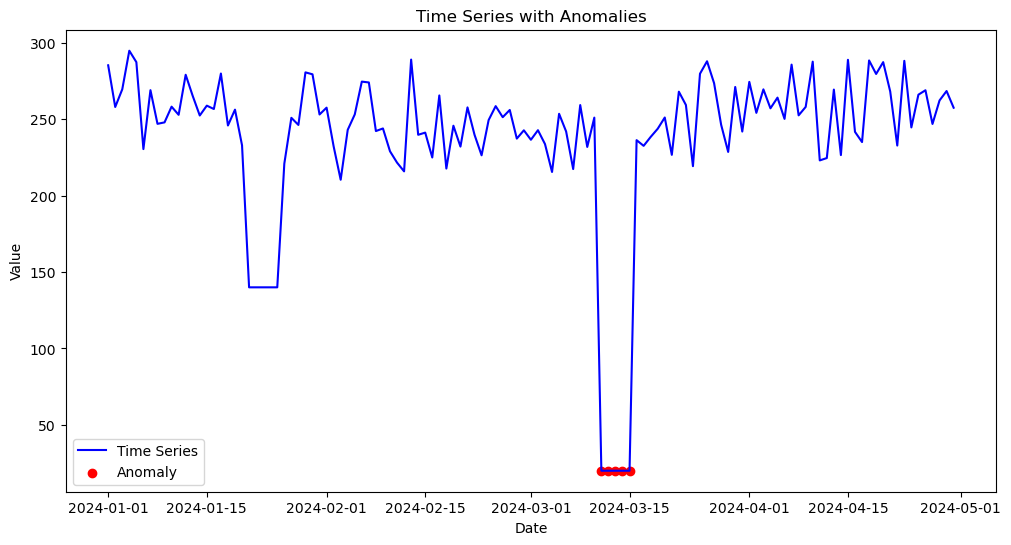

In [126]:
# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], color='blue', label='Time Series')
plt.scatter(df[df['anomaly']].index, df[df['anomaly']]['Value'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomalies')
plt.legend()
plt.show()

In [140]:
# Calculate correlations with the target variable (time series data)
correlations = df7.corr()['timestamp_(min)'].sort_values(ascending=False)

In [141]:
# Display variables with high positive correlations
root_causes_positive = correlations[correlations > 0.5]

# Display variables with high negative correlations (if applicable)
root_causes_negative = correlations[correlations < -0.5]

print("Potential root causes (positive correlation):")
print(root_causes_positive)

print("\nPotential root causes (negative correlation):")
print(root_causes_negative)

Potential root causes (positive correlation):
timestamp_(min)    1.0
Name: timestamp_(min), dtype: float64

Potential root causes (negative correlation):
feature_1   -0.555613
Name: timestamp_(min), dtype: float64
